In [1]:
# Import Data Manipulation Library
import pandas as pd
import numpy as np
# import Data Visulalization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter Warnings Library
import warnings 
warnings.filterwarnings('ignore')
# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                   format = '%(asctime)s - %(levelname)s - %(message)s',
                   filemode = 'w',
                   filename = 'model.log',force = True)
# Import Sci-kit Learn Libraries for Model Building
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
# Importing Metrics for Regression Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
logging.info('Import Dataset For Model Building...')

In [3]:
url = 'https://raw.githubusercontent.com/Pavitrakumar45/CementPrediction_Model/refs/heads/main/Concrete_Data%20(1).csv'

df = pd.read_csv(url)

df.sample(frac = 1)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
210,230.0,0.0,118.3,195.5,4.6,1029.4,758.6,14,20.08
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.40
556,193.5,290.2,0.0,185.7,0.0,998.2,704.3,28,32.63
150,318.8,212.5,0.0,155.7,14.3,852.1,880.4,56,66.10
808,252.0,0.0,0.0,186.0,0.0,1111.0,784.0,7,11.47
...,...,...,...,...,...,...,...,...,...
332,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,56,60.32
599,339.0,0.0,0.0,197.0,0.0,968.0,781.0,7,20.97
143,375.0,93.8,0.0,126.6,23.4,852.1,992.6,56,60.20
31,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365,52.91


In [4]:
df.shape

(1030, 9)

In [5]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [6]:
import statsmodels.api as sm #Ordinary Least Square
X = df.drop(columns='Concrete compressive strength(MPa, megapascals) ', axis=1)
y = df['Concrete compressive strength(MPa, megapascals) ']

In [7]:
X = sm.add_constant(X)

In [8]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                           
============================================================================================================
Dep. Variable:     Concrete compressive strength(MPa, megapascals)    R-squared:                       0.616
Model:                                                          OLS   Adj. R-squared:                  0.613
Method:                                               Least Squares   F-statistic:                     204.3
Date:                                              Thu, 05 Jun 2025   Prob (F-statistic):          6.29e-206
Time:                                                      19:12:59   Log-Likelihood:                -3869.0
No. Observations:                                              1030   AIC:                             7756.
Df Residuals:                                                  1021   BIC:                             7800.
Df Model:                                                         8                                         
Covariance Type:                                          nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                   -23.3312     26.586     -0.878      0.380     -75.500      28.837
Cement (component 1)(kg in a m^3 mixture)                 0.1198      0.008     14.113      0.000       0.103       0.136
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     0.1039      0.010     10.247      0.000       0.084       0.124
Fly Ash (component 3)(kg in a m^3 mixture)                0.0879      0.013      6.988      0.000       0.063       0.113
Water  (component 4)(kg in a m^3 mixture)                -0.1499      0.040     -3.731      0.000      -0.229      -0.071
Superplasticizer (component 5)(kg in a m^3 mixture)       0.2922      0.093      3.128      0.002       0.109       0.476
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0.0181      0.009      1.926      0.054      -0.000       0.037
Fine Aggregate (component 7)(kg in a m^3 mixture)         0.0202      0.011      1.887      0.059      -0.001       0.041
Age (day)                                                 0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#Cheking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [10]:
#Checking the descriptive statistics 
#Univariate Analysis

from  collections import OrderedDict
stats = []

for i in df.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Medain':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),  #
        'Kurtosis':df[i].kurt()
    })
    stats.append(numerical_stats)
    # Saving all OrderDict Dictionary into Dataframe : Structured Format
    report = pd.DataFrame(stats)

report

,Feature,Mean,Medain,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,Cement (component 1)(kg in a m^3 mixture),281.167864,272.900,192.375,350.000,157.625,104.506364,0.509481,-0.520652
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,73.895825,22.000,0.000,142.950,142.950,86.279342,0.800717,-0.508175
2,Fly Ash (component 3)(kg in a m^3 mixture),54.188350,0.000,0.000,118.300,118.300,63.997004,0.537354,-1.328746
3,Water (component 4)(kg in a m^3 mixture),181.567282,185.000,164.900,192.000,27.100,21.354219,0.074628,0.122082
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.204660,6.400,0.000,10.200,10.200,5.973841,0.907203,1.411269
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,972.918932,968.000,932.000,1029.400,97.400,77.753954,-0.040220,-0.599016
6,Fine Aggregate (component 7)(kg in a m^3 mixture),773.580485,779.500,730.950,824.000,93.050,80.175980,-0.253010,-0.102177
7,Age (day),45.662136,28.000,7.000,56.000,49.000,63.169912,3.269177,12.168989
8,"Concrete compressive strength(MPa, megapascals)",35.817961,34.445,23.710,46.135,22.425,16.705742,0.416977,-0.313725


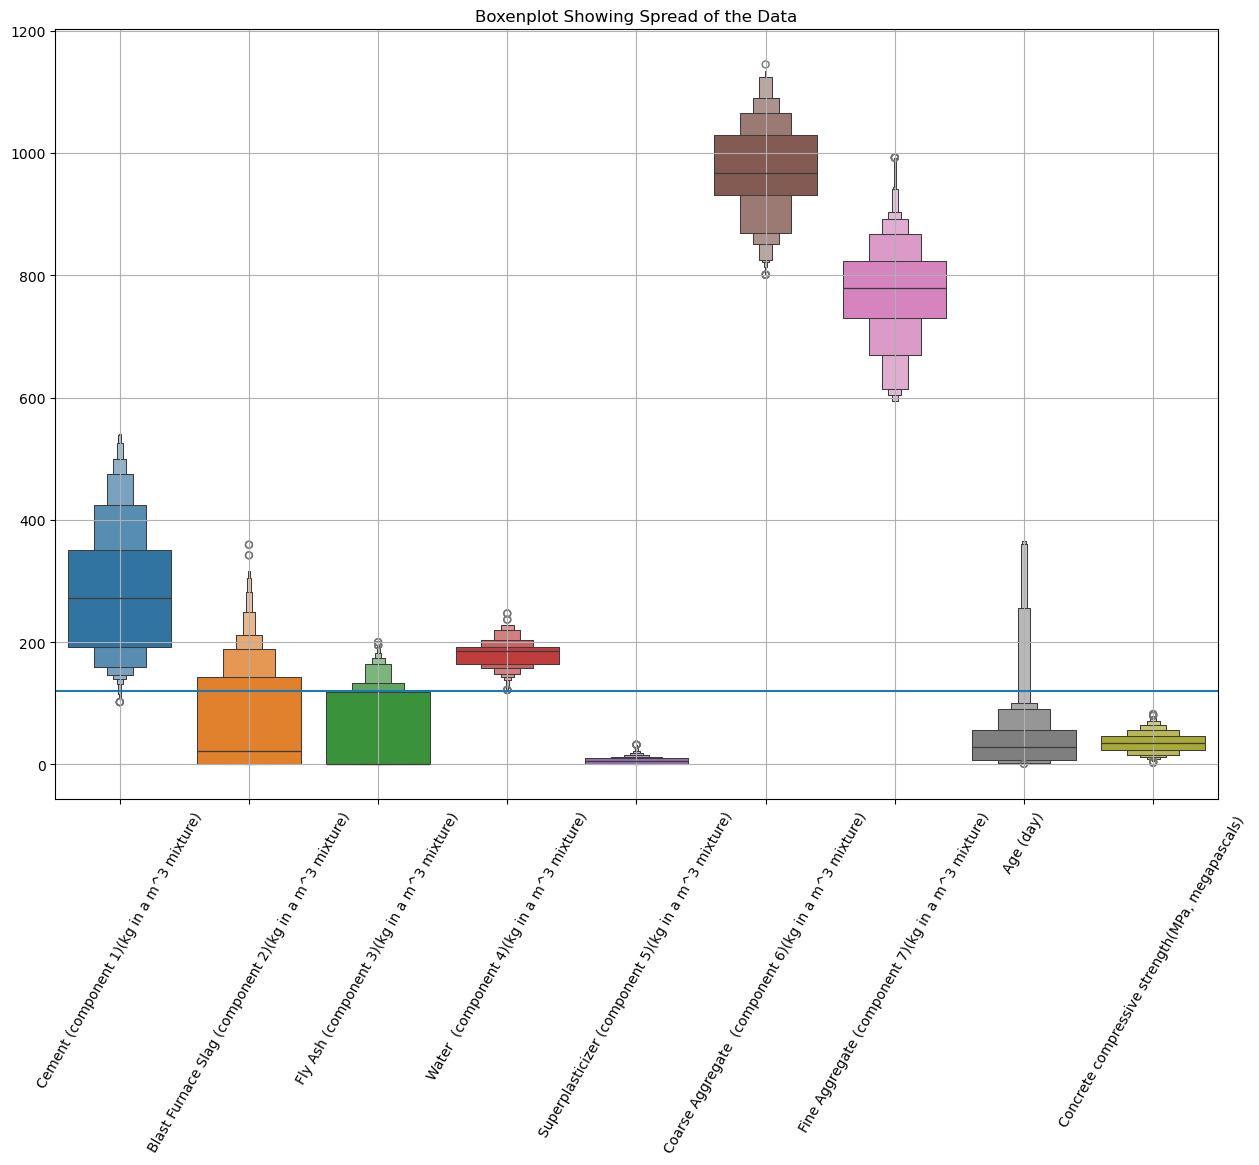

In [11]:
'''
Note:-
1. Postive Kurtosis : Leptokurtic
2. Normal Distribution : Mesokurtic
3. Negative Kurtosis : Platykurtic
......................................
1 Postive Skewness: mode<median<mean
2 No Skewness : normally distributed : mode=median=mean
3 Negative Skewness: mode>median>mean
'''
plt.figure(figsize = (15,10))
sns.boxenplot(df)
plt.axhline(120)
plt.xticks(rotation = 60)
plt.title('Boxenplot Showing Spread of the Data')
plt.grid()
plt.show()

In [12]:
df.corr()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash (component 3)(kg in a m^3 mixture),-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water (component 4)(kg in a m^3 mixture),-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer (component 5)(kg in a m^3 mixture),0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age (day),0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
"Concrete compressive strength(MPa, megapascals)",0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<Axes: >

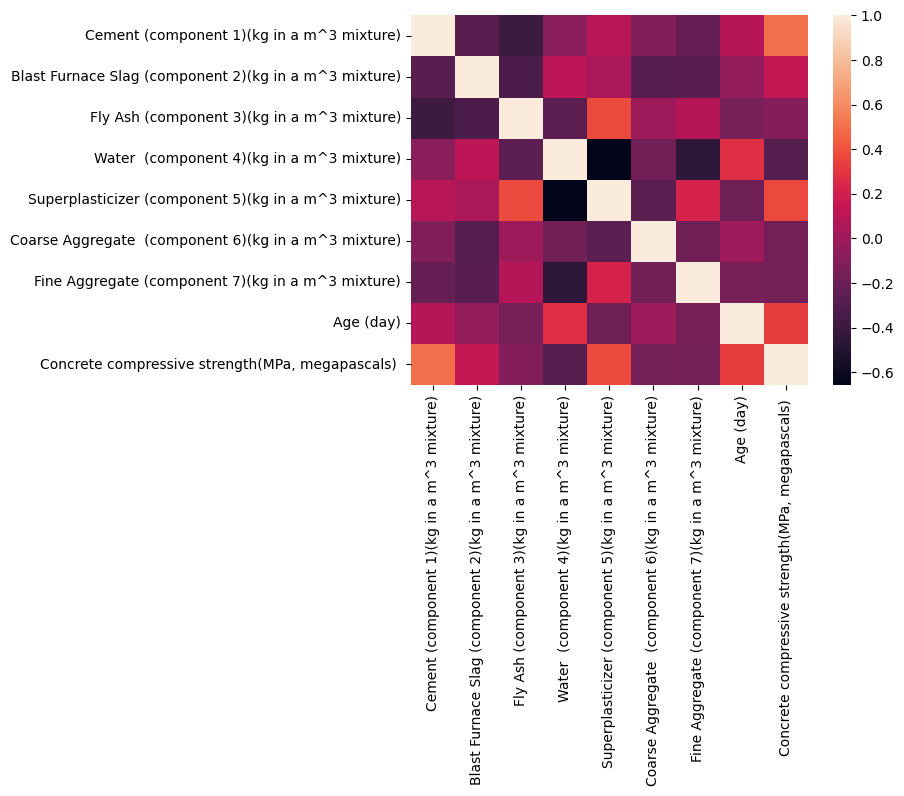

In [13]:
sns.heatmap(df.corr())


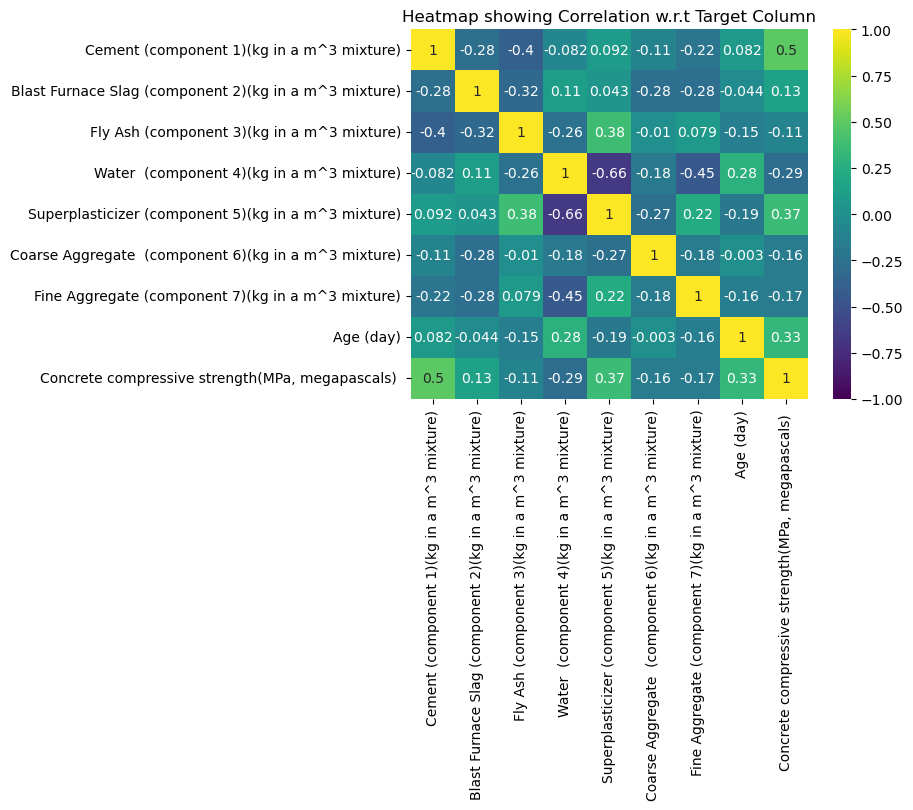

In [14]:
sns.heatmap(df.corr(),annot = True,center = 0 , vmax= 1 ,vmin = -1,cmap = 'viridis')
plt.title('Heatmap showing Correlation w.r.t Target Column')
plt.show()

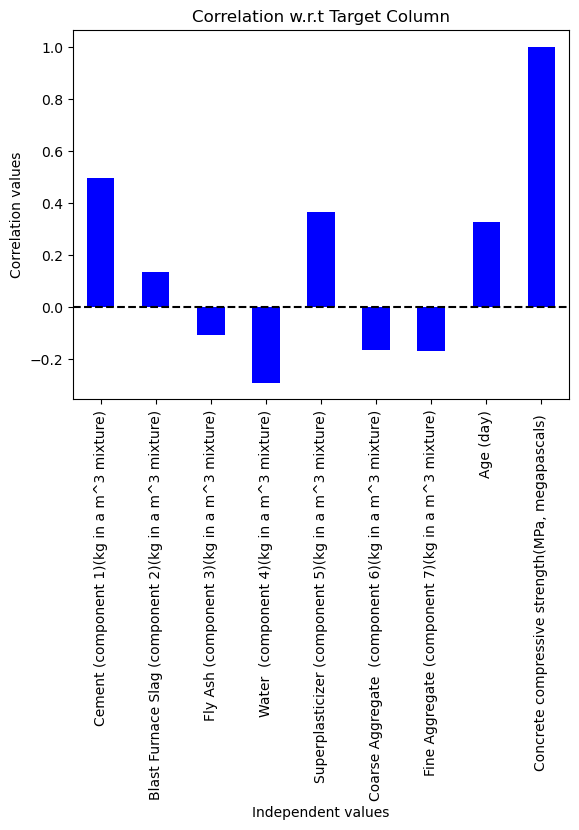

In [15]:
df.corr()['Concrete compressive strength(MPa, megapascals) '].plot(kind = 'bar',color = 'blue')
plt.axhline(0,linestyle = '--',color = 'black')
plt.title('Correlation w.r.t Target Column')
plt.ylabel('Correlation values')
plt.xlabel('Independent values')
plt.show()
          


In [16]:
# DATA Cleaning And Preprocessing


In [17]:
# Checking Top Five Rows of Dataset
'''
1. As the dataset contains no categorical coloumn, hence no need of converting categorical column to numerical column.
2. No missing values present in Given dataset.

'''
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [18]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [19]:
#Preventing Data Leakage

# Step 01: Split the dataset in X and y
# Where X: Independent Column and y: Dependent Column : Target column

X = df.drop(columns = 'Concrete compressive strength(MPa, megapascals) ',axis = 1) # drops inside X, but presnt in df
y = df['Concrete compressive strength(MPa, megapascals) ']

# Step 02: Using Train Test Split
#test_size lies between 0.20 to 0.35(20-30 is enough)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42) 

# Step 03: Using Scaling Technique
sc = MinMaxScaler()

#Seen data
X_train = sc.fit_transform(X_train)

# Unseen Data
X_test = sc.transform(X_test)

In [20]:
X_train.max(), X_train.min() # perfect ranges between 0 and 1

(1.0000000000000002, 0.0)

In [21]:
#Model Building

In [22]:
#Linear Regression

from sklearn.linear_model import LinearRegression
# Fit model is always on training or seen dataset
LR = LinearRegression().fit(X_train,y_train)
# Prediction values are based on unseen data i.e Test Data
y_pred_LR = LR.predict(X_test)
# y_test : actual value and y_pred_LR : Predicted value 
print('Model Accuracy for Linear Regression', r2_score(y_test, y_pred_LR))

Model Accuracy for Linear Regression 0.5943782479239215


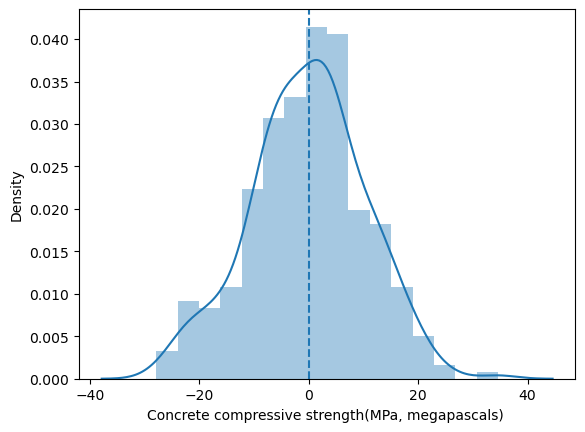

In [23]:
sns.distplot(y_test-y_pred_LR)
plt.axvline(0,linestyle= '--')

Text(0, 0.5, 'Y_pred')

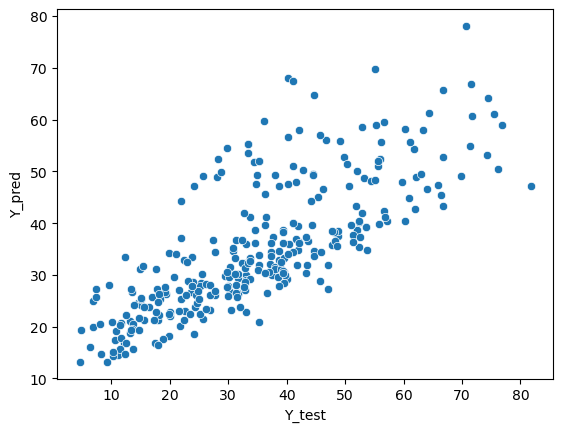

In [24]:
sns.scatterplot(x = y_test,y = y_pred_LR)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

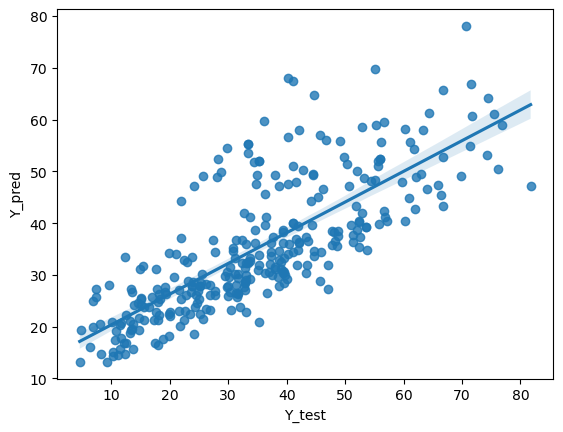

In [25]:
sns.regplot(x = y_test,y = y_pred_LR)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [26]:
#Evaluate Coefficient
LR.coef_ #coefficient-x, total 8 columns

array([ 54.95342731,  41.97459796,  17.55268553, -11.34057972,
        12.76701497,   9.66978699,  14.4992847 ,  41.47485093])

In [27]:
#Evaluate Constant Value
LR.intercept_

-13.616932642237423

In [28]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
# Fit model is always on training or seen dataset
DT = DecisionTreeRegressor().fit(X_train,y_train)
# Prediction values are based on unseen data i.e Test Data
y_pred_DT = DT.predict(X_test)
# y_test : actual value and y_pred_DT : Predicted value 
print('Model Accuracy for Decision tree Regression', r2_score(y_test, y_pred_DT))

Model Accuracy for Decision tree Regression 0.823500513393518


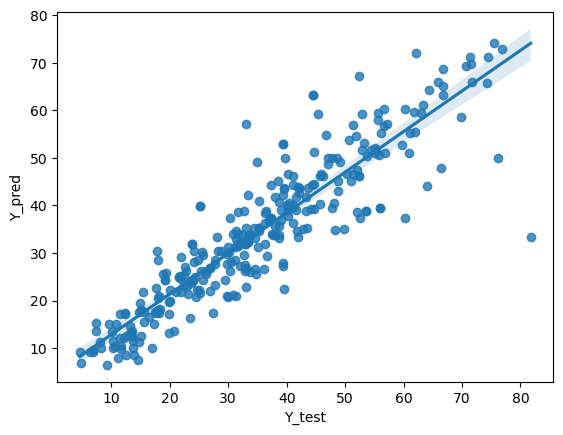

In [29]:
sns.regplot(x = y_test,y = y_pred_DT)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

Text(0, 0.5, 'Y_pred')

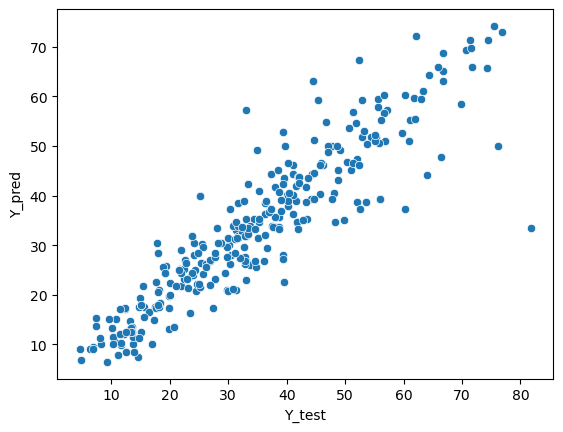

In [30]:
sns.scatterplot(x = y_test,y = y_pred_DT)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')

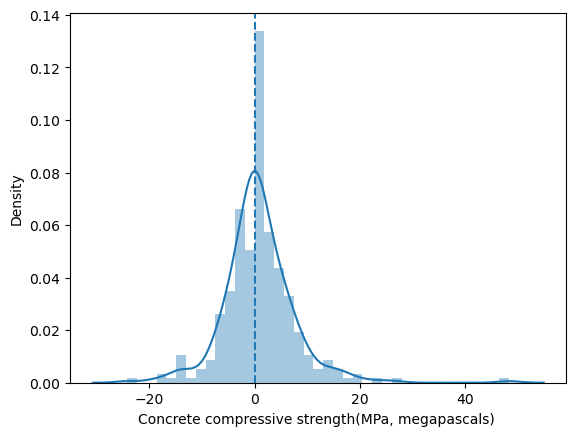

In [31]:
sns.distplot(y_test-y_pred_DT)
plt.axvline(0,linestyle= '--')

In [32]:
# Random Forest Reggressor

from sklearn.ensemble import RandomForestRegressor

RT = RandomForestRegressor().fit(X_train,y_train)
# Prediction values are based on unseen data i.e Test Data
y_pred_RT = RT.predict(X_test)
# y_test : actual value and y_pred_DT : Predicted value 
print('Model Accuracy for Decision tree Regression', r2_score(y_test, y_pred_RT))

Model Accuracy for Decision tree Regression 0.8833119133408897


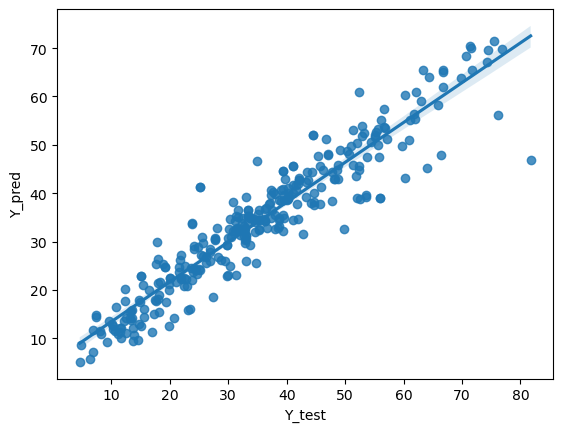

In [33]:
sns.regplot(x = y_test,y = y_pred_RT)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

<Axes: xlabel='Concrete compressive strength(MPa, megapascals) ', ylabel='Density'>

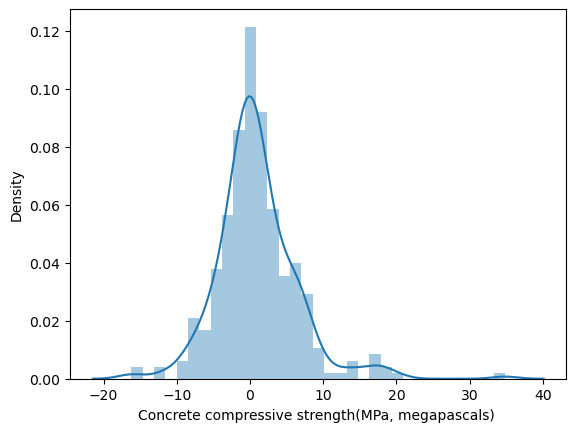

In [34]:
sns.distplot(y_test-y_pred_RT)


In [35]:
Features = RT.feature_importances_
Features

array([0.32605963, 0.07024331, 0.019912  , 0.11566383, 0.06803629,
       0.02856678, 0.03767671, 0.33384145])

In [36]:
feature_names = X.columns
importance_df = pd.Series(Features, index=feature_names)
importance_df

Cement (component 1)(kg in a m^3 mixture)                0.326060
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.070243
Fly Ash (component 3)(kg in a m^3 mixture)               0.019912
Water  (component 4)(kg in a m^3 mixture)                0.115664
Superplasticizer (component 5)(kg in a m^3 mixture)      0.068036
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.028567
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.037677
Age (day)                                                0.333841
dtype: float64

In [37]:
# Using XgBoost Algorithm

import xgboost as xg

xgb = xg.XGBRegressor().fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Regressor',r2_score(y_test,y_pred_xgb))

Model Accuracy for XGBoost Regressor 0.9104444067517969


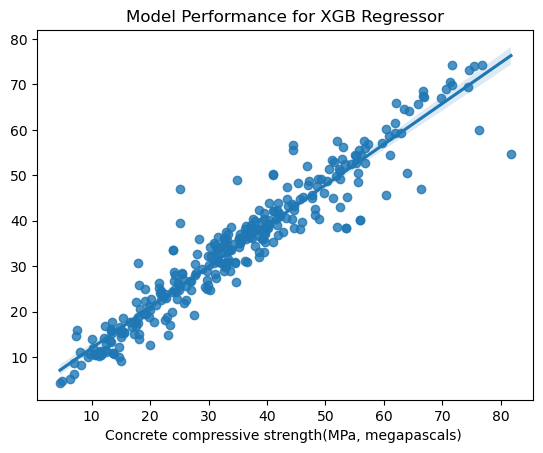

In [38]:
# Model Performance for XGB

sns.regplot(x = y_test , y= y_pred_xgb)
plt.title('Model Performance for XGB Regressor')
plt.show()

<Axes: xlabel='Concrete compressive strength(MPa, megapascals) ', ylabel='Density'>

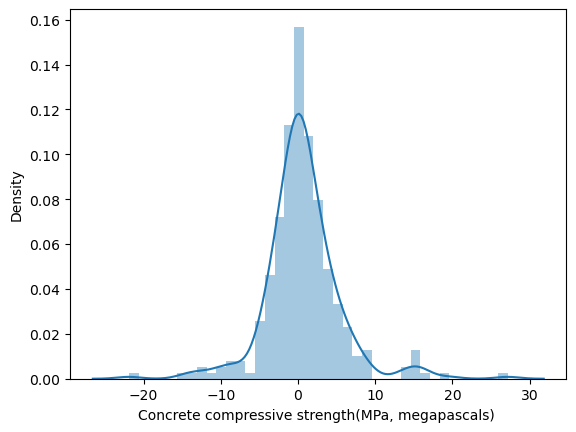

In [39]:
sns.distplot(y_test-y_pred_xgb)

In [40]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor().fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

print('Model Accuracy for ADABoost Regressor',r2_score(y_test,y_pred_ada))

Model Accuracy for ADABoost Regressor 0.7843679875855405


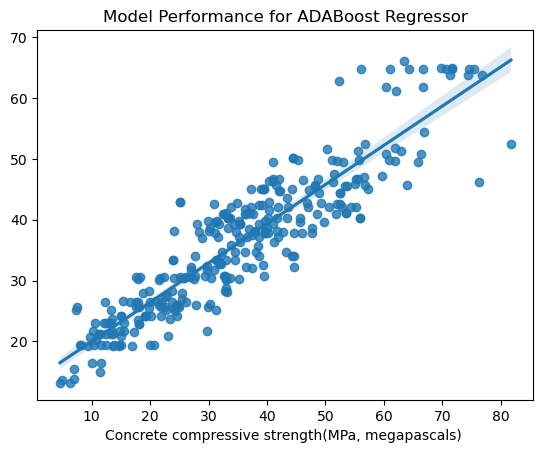

In [41]:
sns.regplot(x = y_test , y= y_pred_ada)
plt.title('Model Performance for ADABoost Regressor')
plt.show()

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor().fit(X_train,y_train)
y_pred_gb = GB.predict(X_test)

print('Model Accuracy for GradientBoosting Regressor ',r2_score(y_test,y_pred_gb))

Model Accuracy for GradientBoosting Regressor  0.8911105934334151


In [43]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor().fit(X_train,y_train)
y_pred_KNN = KNN.predict(X_test)

print('Model Accuracy for KNeighbors Regressor ',r2_score(y_test,y_pred_KNN))


Model Accuracy for KNeighbors Regressor  0.6457281524418169


In [90]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the model
RF = RandomForestRegressor(random_state=42)

# Define hyperparameter grid
param_dist = {
    'n_estimators':[100,200,300,500],
    'max_depth': [None,10,20,30,40],
    'min_samples_split': [2,5,8],
    'min_samples_leaf' : [1,2,4],
    'max_features': ['auto','sqrt','log2']
}

# RandomRandomizedSearchCV Setup

random_search = RandomizedSearchCV(
    estimator = RF,
    param_distributions = param_dist,
    n_iter = 50,
    cv = 5,
    scoring = 'r2',
    random_state = 42,
    n_jobs = -1
)
# Fit to training data
random_search.fit(X_train,y_train)

# Best Model
best_rf = random_search.best_estimator_
print('Best parameters:',random_search.best_params_)
print('Best R2 Score on CV:',random_search.best_score_)

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best R2 Score on CV: 0.8932331477435091
